## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Dog-Breed-Classification"

In [3]:
!ls "/content/drive/My Drive/Dog-Breed-Classification"

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
import numpy as np

In [10]:
def append_ext(fn):
    return fn+".jpg"
ds_ss = pd.read_csv('sample_submission.csv')
ds_ss["id"]=ds_ss["id"].apply(append_ext)
ds_ss.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0

In [11]:
labelds = pd.read_csv('labels.csv')


labelds["id"]=labelds["id"].apply(append_ext)

print(len(labelds.breed.unique()))

120


In [12]:
labelds.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


### Print the count of each category of Dogs given in the dataset



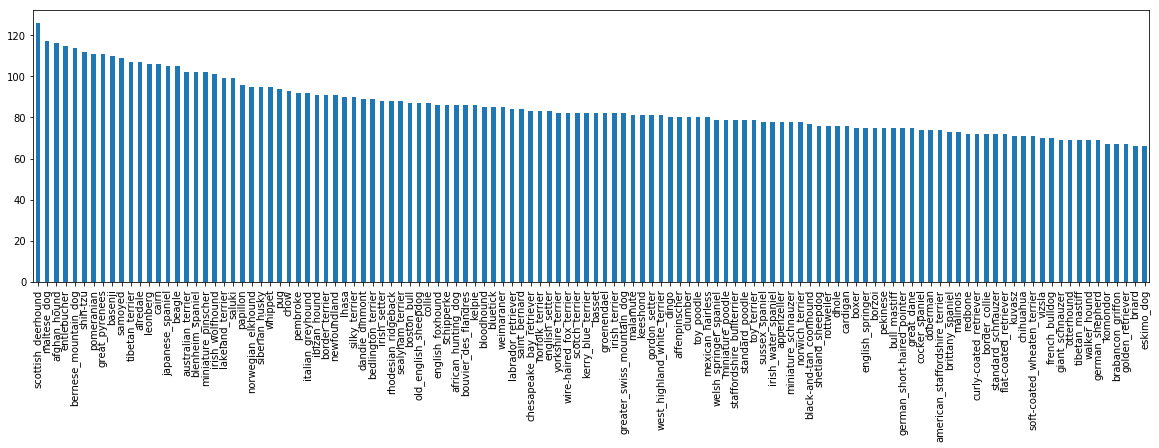

In [13]:
labelds['breed'].value_counts().plot.bar(figsize=(20,5))

In [14]:
labelds.breed.value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
leonberg                          106
cairn                             106
japanese_spaniel                  105
beagle                            105
australian_terrier                102
blenheim_spaniel                  102
miniature_pinscher                102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
norwegian_elkhound                 95
siberian_husky                     95
whippet                            95
pug         

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(labelds['breed'])

In [0]:
labelds['breed_cat'] =le.fit_transform(labelds['breed'])

labelds['breed_cat'] = labelds['breed_cat'].astype('str')

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [17]:
from keras.preprocessing.image import load_img
import matplotlib.pylab as plt
import cv2
x_train = []
Ytrain =[]
for index ,row in labelds.iterrows():
   img = cv2.imread('/content/train/'+row['id'])
   x_train.append(cv2.resize(img, (128, 128)))
   #x_train.append(cv2.resize(img, (224, 224)))
   Ytrain.append(row['breed_cat'])

Using TensorFlow backend.


In [18]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(Ytrain, num_classes=120)

y_train.shape , x_train[0].shape

((10222, 120), (128, 128, 3))

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train = np.array(x_train)
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],128,128,3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [20]:
from sklearn.model_selection import train_test_split
x_train_data,x_val, y_train_data ,y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=20)
print (len(x_train_data))
print (len(x_val))

7666
2556


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img = ds_ss['id']

Run the below code to load the test image files in x_test_feature

In [0]:
from tqdm import tqdm

In [25]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('/content/test/' + f)
    img_resize = cv2.resize(img, (128, 128)) 
    img_resize_224 = cv2.resize(img, (224, 224))
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:27<00:00, 375.68it/s]


Normalize the test data and convert it into 4 dimensions

In [26]:
x_test_feature = np.array(x_test_feature)
x_test_feature = x_test_feature.astype('float32')
x_test_feature /= 255
#x_test_feature = x_test_feature.reshape(len(x_test_feature),128,128,3)

x_test_feature.shape

(10357, 128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Flatten
from keras.optimizers import adam,SGD
K.set_image_dim_ordering('th')

In [28]:
model = Sequential()

model.add(Conv2D(32,(5, 5), activation='relu',padding='same', input_shape=(128, 128, 3),data_format="channels_last"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))

model.add(Conv2D(32,(3, 3), activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

W0805 12:38:47.460836 140550913017728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 12:38:47.509429 140550913017728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 12:38:47.516374 140550913017728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 12:38:47.547316 140550913017728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0805 12:38:47.548361 1405509130

In [29]:
model.add(Flatten()) 

# fully connected layer
model.add(Dense(256,activation = 'relu'))
model.add(Dense(120, activation = 'softmax')) 

#optimizer = adam(lr=0.001)
#earlystop = EarlyStopping(patience=5)

#sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

W0805 12:38:59.099112 140550913017728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 63, 15)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 63, 15)        36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 21, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               860416    
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total para

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
batch_size = 128

In [32]:
history = model.fit(x_train_data,y_train_data,
                    epochs=10, 
                    batch_size=batch_size,
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

W0805 12:39:29.071301 140550913017728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 10s 1ms/step - loss: 4.7688 - acc: 0.0117 - val_loss: 4.7234 - val_acc: 0.0172
Epoch 2/10
7666/7666 [==============================] - 4s 489us/step - loss: 4.6174 - acc: 0.0278 - val_loss: 4.5906 - val_acc: 0.0258
Epoch 3/10
7666/7666 [==============================] - 4s 483us/step - loss: 4.4339 - acc: 0.0474 - val_loss: 4.4774 - val_acc: 0.0419
Epoch 4/10
7666/7666 [==============================] - 4s 486us/step - loss: 4.2399 - acc: 0.0660 - val_loss: 4.4411 - val_acc: 0.0430
Epoch 5/10
7666/7666 [==============================] - 4s 485us/step - loss: 4.0147 - acc: 0.1021 - val_loss: 4.5063 - val_acc: 0.0469
Epoch 6/10
7666/7666 [==============================] - 4s 486us/step - loss: 3.7009 - acc: 0.1534 - val_loss: 4.6243 - val_acc: 0.0524
Epoch 7/10
7666/7666 [==============================] - 4s 487us/step - loss: 3.2781 - acc: 0.2332 - val_loss: 4.9562 - val_acc: 0.0473
E

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE =(128,128)

datagen1=ImageDataGenerator(rescale=1./255.,validation_split=0.25,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    data_format ='channels_last'
  
   )

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [34]:
train_generator1 = datagen1.flow_from_dataframe(
dataframe=labelds,
directory="/content/train/",
x_col="id",
y_col="breed",
has_ext=True,
subset="training",
seed=32,
shuffle=True,
class_mode="categorical",
target_size=IMAGE_SIZE)


valid_generator1=datagen1.flow_from_dataframe(
dataframe=labelds,
directory="/content/train/",
x_col="id",
y_col="breed",
subset="validation",
has_ext=True,
seed=32,
shuffle=True,
class_mode="categorical",
target_size=IMAGE_SIZE)

test_datagen1 = ImageDataGenerator(rescale=1./255)

test_generator1=test_datagen1.flow_from_dataframe(
dataframe=ds_ss,
directory="/content/test/",
x_col="id",
y_col=None,
has_ext=True,
seed=32,
shuffle=True,
class_mode=None,
target_size=IMAGE_SIZE)

Found 7667 validated image filenames belonging to 120 classes.
Found 2555 validated image filenames belonging to 120 classes.
Found 10357 validated image filenames.


In [35]:
train_generator1.image_shape

(128, 128, 3)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [36]:
STEP_SIZE_TRAIN=train_generator1.n//train_generator1.batch_size
STEP_SIZE_VALID=valid_generator1.n//valid_generator1.batch_size
STEP_SIZE_TEST=test_generator1.n//test_generator1.batch_size

history = model.fit_generator(generator=train_generator1,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator1,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

Epoch 1/10
239/239 [==============================] - 60s 253ms/step - loss: 4.7861 - acc: 0.0184 - val_loss: 4.6778 - val_acc: 0.0202
Epoch 2/10
239/239 [==============================] - 57s 241ms/step - loss: 4.6133 - acc: 0.0256 - val_loss: 4.5736 - val_acc: 0.0218
Epoch 3/10
239/239 [==============================] - 57s 238ms/step - loss: 4.5283 - acc: 0.0336 - val_loss: 4.5204 - val_acc: 0.0337
Epoch 4/10
239/239 [==============================] - 57s 238ms/step - loss: 4.4813 - acc: 0.0378 - val_loss: 4.5272 - val_acc: 0.0270
Epoch 5/10
239/239 [==============================] - 57s 238ms/step - loss: 4.4526 - acc: 0.0438 - val_loss: 4.5204 - val_acc: 0.0305
Epoch 6/10
239/239 [==============================] - 57s 239ms/step - loss: 4.4059 - acc: 0.0454 - val_loss: 4.4757 - val_acc: 0.0420
Epoch 7/10
239/239 [==============================] - 57s 239ms/step - loss: 4.3817 - acc: 0.0452 - val_loss: 4.4715 - val_acc: 0.0380
Epoch 8/10
239/239 [==============================] - 5

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights="imagenet",
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [42]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, None, None)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, None, None)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, None, None)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, None, None)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, None, None)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, None, None)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, None, None)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras.models import Model, Input
from keras import layers 
import datetime
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from keras.layers import GlobalAveragePooling2D,Activation,Flatten,Dense,BatchNormalization,Dropout
from keras.optimizers import adam,SGD

In [0]:
for layer in base_model.layers[:5]:
    layer.trainable = False

In [0]:
x = base_model.output
x = BatchNormalization()(x)

In [0]:
x = Dropout(0.35)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train

model_t = Model(inputs=base_model.input, outputs=predictions)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping
for layer in base_model.layers:
    layer.trainable = False

checkpoint = ModelCheckpoint("vgg16_best.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.25, 
                                            min_lr=0.00001)

callbacks = [early_stopping, learning_rate_reduction,checkpoint]

model_t.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"]
              )

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from keras.preprocessing.image import ImageDataGenerator

def X_preprocess(img):
    input_img = preprocess_input(np.expand_dims(img, axis=0))
    return input_img[0]

In [0]:
IMAGE_SIZE =(224,224)

datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25,
     rotation_range=15, shear_range=0.1, channel_shift_range=20,width_shift_range=0.1,  height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

In [60]:
train_generator = datagen.flow_from_dataframe(
dataframe=labelds,
directory="./train/",
x_col="id",
y_col="breed_cat",
subset="training",
batch_size=128,
seed=32,
has_ext=True,
shuffle=False,
class_mode="categorical",
target_size=IMAGE_SIZE,preprocessing_function=X_preprocess)

Found 7667 validated image filenames belonging to 120 classes.


In [61]:
valid_generator=datagen.flow_from_dataframe(
dataframe=labelds,
directory="./train/",
x_col="id",
y_col="breed_cat",
has_ext=True,
subset="validation",
batch_size=128,
seed=32,
shuffle=False,
class_mode="categorical",
target_size=IMAGE_SIZE,preprocessing_function=X_preprocess)

test_datagen = ImageDataGenerator(rescale=1./255.)

Found 2555 validated image filenames belonging to 120 classes.


In [62]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=ds_ss,
directory="./test/",
x_col="id",
y_col=None,
batch_size=128,
seed=32,
shuffle=False,
class_mode=None,
target_size=IMAGE_SIZE,preprocessing_function=X_preprocess)

Found 10357 validated image filenames.


In [63]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = model_t.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks = callbacks )

Epoch 1/10
59/59 [==============================] - 132s 2s/step - loss: 4.7716 - acc: 0.0143 - val_loss: 4.6421 - val_acc: 0.0366

Epoch 00001: val_acc improved from -inf to 0.03660, saving model to vgg16_best.h5
Epoch 2/10
59/59 [==============================] - 122s 2s/step - loss: 4.4807 - acc: 0.0345 - val_loss: 4.2996 - val_acc: 0.0499

Epoch 00002: val_acc improved from 0.03660 to 0.04986, saving model to vgg16_best.h5
Epoch 3/10
59/59 [==============================] - 110s 2s/step - loss: 4.2274 - acc: 0.0531 - val_loss: 3.9951 - val_acc: 0.0758

Epoch 00003: val_acc improved from 0.04986 to 0.07581, saving model to vgg16_best.h5
Epoch 4/10
59/59 [==============================] - 115s 2s/step - loss: 3.9901 - acc: 0.0817 - val_loss: 3.8303 - val_acc: 0.1038

Epoch 00004: val_acc improved from 0.07581 to 0.10383, saving model to vgg16_best.h5
Epoch 5/10
59/59 [==============================] - 116s 2s/step - loss: 3.8184 - acc: 0.0999 - val_loss: 3.6677 - val_acc: 0.1211

Epo

In [0]:
from tqdm import tqdm
import numpy as np
import cv2
from keras.applications.vgg16 import VGG16, preprocess_input

In [0]:
INPUT_SIZE = 224
POOLING = 'avg'
x_train = np.zeros((len(labelds), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
for i, img_id in tqdm(enumerate(labelds['id'])):
    img = cv2.imread('./train/'+img_id)
    img = cv2.resize(img, (224, 224))
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    x_train[i] = x
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

In [0]:
rnd = np.random.random(len(labelds))
train_idx = rnd < 0.8
valid_idx = rnd >= 0.8

Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, ytr.shape, yv.shape))
vgg_bottleneck = VGG16(weights='imagenet', include_top=False, pooling=POOLING)
train_vgg_bf = vgg_bottleneck.predict(Xtr, batch_size=32, verbose=1)
valid_vgg_bf = vgg_bottleneck.predict(Xv, batch_size=32, verbose=1)
print('VGG train bottleneck features shape: {} size: {:,}'.format(train_vgg_bf.shape, train_vgg_bf.size))
print('VGG valid bottleneck features shape: {} size: {:,}'.format(valid_vgg_bf.shape, valid_vgg_bf.size))

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=SEED)
logreg.fit(train_vgg_bf, (ytr * range(NUM_CLASSES)).sum(axis=1))
valid_probs = logreg.predict_proba(valid_vgg_bf)
valid_preds = logreg.predict(valid_vgg_bf)

In [0]:
print('Validation VGG LogLoss {}'.format(log_loss(yv, valid_probs)))
print('Validation VGG Accuracy {}'.format(accuracy_score((yv * range(NUM_CLASSES)).sum(axis=1), valid_preds)))